In [4]:
import matplotlib.pyplot as plt
import numpy as np
import segyio
from tqdm import tqdm
import xarray as xr

In [7]:
pbar = tqdm(["a", "b", "c", "d"])
for i, char in enumerate(pbar):
    pbar.set_description("Processing %s" % char)

Processing d: 100%|██████████| 4/4 [00:00<00:00, 2764.87it/s]


In [34]:
dstpath = 'Modeling_data/Meshdurechenskaya/Rho 3D Big_tilted_trim.sgy'
src = segyio.open(dstpath, mode='r', endian='big', ignore_geometry=True)
vp = segyio.tools.collect(src.trace[:])
cdpx = []
cdpy = []
# print(cdpx.shape)
for i, th in enumerate(src.header[:]):
    cdpx.append(th[segyio.TraceField.CDP_X])
    cdpy.append(th[segyio.TraceField.CDP_Y])
src.close()
xu = np.unique(cdpx)
yu = np.unique(cdpy)
vp = np.reshape(vp, (yu.size, xu.size, vp.shape[-1]))
print(vp.shape)

(801, 1001, 385)


In [14]:
rec_coordinates = np.zeros((12012,3))
for i in range(12):
    rec_coordinates[i*1001:i*1001+1001,0] = np.linspace(0, 5000, 1001)
    rec_coordinates[i*1001:i*1001+1001,1] = i*50
    rec_coordinates[i*1001:i*1001+1001,2] = 0

In [45]:
nsou = 5*(1000/25+1)
src_coords = np.zeros((int(nsou),3))
for i in range(5):
    src_coords[i*41:(i+1)*41, 0] = np.arange(2000,3001,25)
    src_coords[i*41:(i+1)*41, 1] = 175 + i*50
    src_coords[i*41:(i+1)*41, 2] = 0

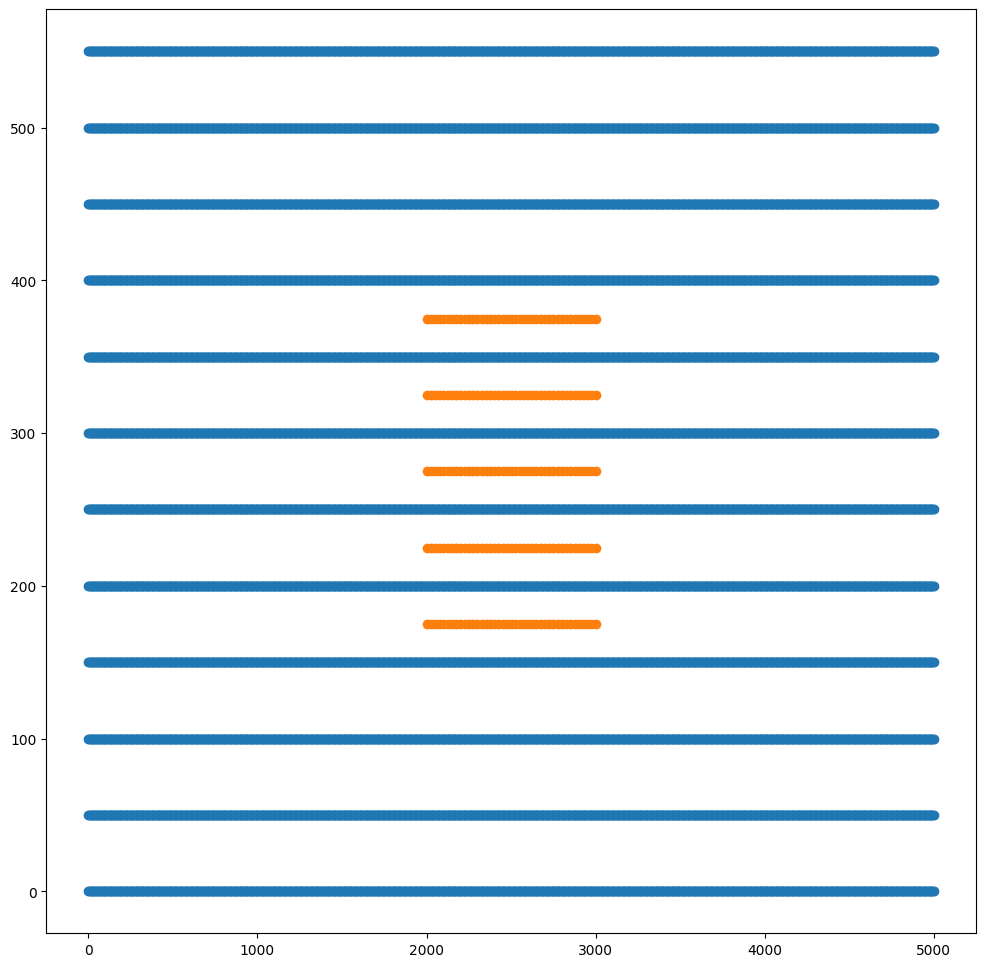

In [18]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()
ax.scatter(rec_coordinates[:,0], rec_coordinates[:,1])
ax.scatter(src_coords[:,0], src_coords[:,1])